This data set is a Beer data-set for your Data Science case-study round. You are expected to
build a Machine Learning model which predicts the overall rating of the beer. (“review/overall”
column in “train.csv” is your dependent variable.)
You are free to formulate this prediction problem either as a classification problem or regression
problem.

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [198]:
df=pd.read_csv('train.csv')
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [200]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [201]:
# Removing unnecessary columns
df.drop(columns=['user/birthdayRaw', 'user/birthdayUnix', 'review/timeStruct', 'index'],inplace=True)

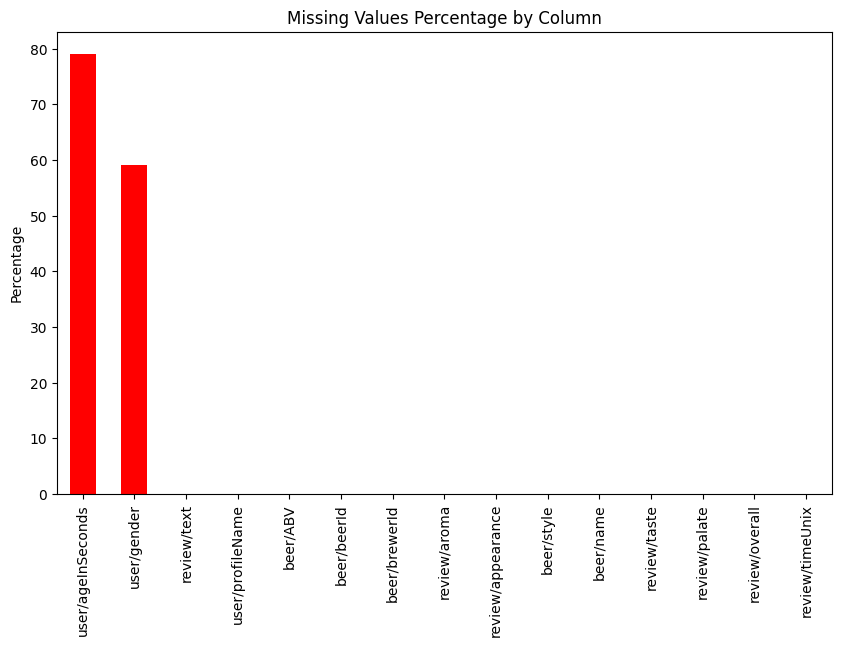

In [202]:
# Calculate and visualize missing value percentage for each column
missing_percentage = df.isnull().mean().sort_values(ascending=False) * 100
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='red')
plt.title("Missing Values Percentage by Column")
plt.ylabel("Percentage")
plt.show()

In [203]:
df.isna().sum()

,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0
review/taste,0


In [204]:
# Missing values handling
df['user/gender'].fillna('unknown',inplace=True)
df['user/profileName'].fillna('Anonymous',inplace=True)
df

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/gender,user/profileName
0,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,1229398690,NaN,unknown,RblWthACoz
1,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,1218238738,NaN,unknown,BeerSox
2,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1101492422,NaN,Male,mschofield
3,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1308532025,1.209827e+09,Male,molegar76
4,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,1299912708,NaN,unknown,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,1207871761,NaN,unknown,Redrover
37496,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,1263102314,NaN,unknown,jmerloni
37497,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,1067043816,NaN,unknown,UncleJimbo
37498,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,1296330753,NaN,unknown,Stockfan42


In [205]:
# Converting age in years
df['user/ageInYears'] = df['user/ageInSeconds'].apply(lambda x: x / (60 * 60 * 24 * 365) if pd.notnull(x) else np.nan)


In [206]:
df['user/ageInYears'].isna().sum()

29644

In [207]:
df['user/ageInYears'].fillna(df['user/ageInYears'].median(),inplace=True)

In [208]:
df['user/ageInYears'].isna().sum()

0

In [209]:
# Drop original 'user/ageInSeconds' column
df.drop(columns=['user/ageInSeconds'], inplace=True)

In [210]:
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/gender,user/profileName,user/ageInYears
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,1229398690,unknown,RblWthACoz,34.881058
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,1218238738,unknown,BeerSox,34.881058
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1101492422,Male,mschofield,34.881058
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1308532025,Male,molegar76,38.363364
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,1299912708,unknown,Brewbro000,34.881058


In [211]:
#  Feature Engineering
# Extracting year, month, and day from review/timeUnix
df['review/year'] = pd.to_datetime(df['review/timeUnix'], unit='s').dt.year
df['review/month'] = pd.to_datetime(df['review/timeUnix'], unit='s').dt.month
df['review/day'] = pd.to_datetime(df['review/timeUnix'], unit='s').dt.day

In [212]:
# Droping 'review/timeUnix'
df.drop(columns=['review/timeUnix'], inplace=True)

In [213]:
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/gender,user/profileName,user/ageInYears,review/year,review/month,review/day
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,unknown,RblWthACoz,34.881058,2008,12,16
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,unknown,BeerSox,34.881058,2008,8,8
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,Male,mschofield,34.881058,2004,11,26
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,Male,molegar76,38.363364,2011,6,20
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,unknown,Brewbro000,34.881058,2011,3,12


In [214]:
df.isna().sum()

,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0
review/taste,0


In [215]:
# Convert categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le_style = LabelEncoder()
df['beer/style_encoded'] = le_style.fit_transform(df['beer/style'])

le_gender = LabelEncoder()
df['user/gender_encoded'] = le_gender.fit_transform(df['user/gender'])

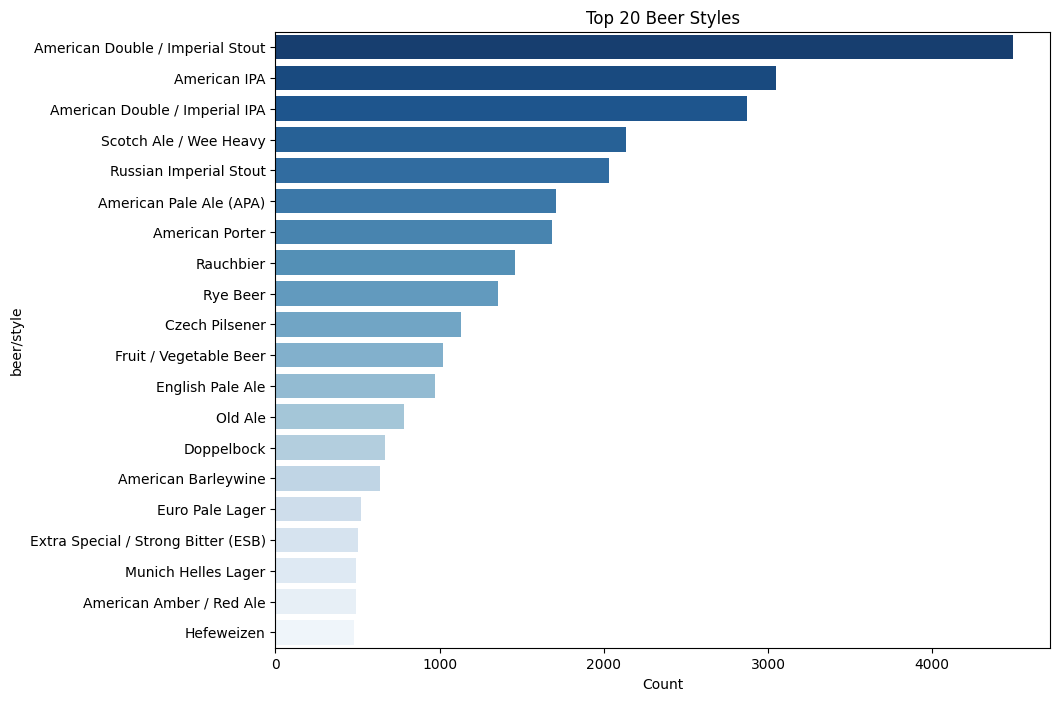

In [216]:
# Bar plot for 'beer/style' (top 20 styles)
plt.figure(figsize=(10, 8))
top_styles = df['beer/style'].value_counts().head(20)
sns.barplot(y=top_styles.index, x=top_styles.values, palette='Blues_r')
plt.title("Top 20 Beer Styles")
plt.xlabel("Count")
plt.show()

In [217]:
for i in df.columns:
    print(i,":",df[i].nunique())



beer/ABV : 126
beer/beerId : 1731
beer/brewerId : 212
beer/name : 1688
beer/style : 95
review/appearance : 10
review/aroma : 9
review/overall : 10
review/palate : 9
review/taste : 9
review/text : 37482
user/gender : 3
user/profileName : 7442
user/ageInYears : 1471
review/year : 14
review/month : 12
review/day : 31
beer/style_encoded : 95
user/gender_encoded : 3


In [218]:
# Drop original categorical columns
df.drop(columns=['beer/style', 'user/gender', 'beer/name', 'review/text', 'user/profileName'], inplace=True)

In [219]:
df

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/ageInYears,review/year,review/month,review/day,beer/style_encoded,user/gender_encoded
0,5.00,46634,14338,4.0,4.0,4.0,4.0,4.0,34.881058,2008,12,16,61,2
1,11.00,3003,395,4.0,3.5,3.5,3.5,3.0,34.881058,2008,8,8,4,2
2,4.70,961,365,3.5,4.0,3.5,3.5,3.5,34.881058,2004,11,26,14,1
3,4.40,429,1,3.0,3.0,2.5,3.0,3.0,38.363364,2011,6,20,35,1
4,4.40,4904,1417,4.0,3.0,3.0,3.5,2.5,34.881058,2011,3,12,46,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,5.50,22450,3268,4.0,3.5,3.5,3.5,3.5,34.881058,2008,4,10,58,2
37496,8.50,7463,1199,4.5,4.0,3.5,4.5,4.5,34.881058,2010,1,10,85,2
37497,4.75,1154,394,4.0,3.5,4.0,4.5,4.0,34.881058,2003,10,25,75,2
37498,11.20,19960,1199,4.0,4.0,4.0,5.0,5.0,34.881058,2011,1,29,11,2


In [220]:
df.duplicated().sum()

35

In [221]:
df[df.duplicated()]

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/ageInYears,review/year,review/month,review/day,beer/style_encoded,user/gender_encoded
3405,6.5,20478,1199,4.0,4.5,4.0,4.0,4.5,34.881058,2009,10,29,12,1
12161,11.2,19960,1199,4.0,4.5,4.5,4.5,4.5,34.881058,2009,3,28,11,2
15285,6.6,16074,1199,4.0,4.0,4.0,4.0,4.5,34.881058,2010,2,28,82,2
15427,9.4,47695,14879,4.0,4.0,4.5,4.0,4.5,34.881058,2011,8,23,81,2
15617,8.6,58053,395,4.0,3.5,3.5,3.5,3.5,34.881058,2010,8,24,18,2
17966,11.2,19960,1199,5.0,5.0,5.0,5.0,5.0,34.881058,2008,3,22,11,2
18711,4.3,7731,14,4.0,4.0,4.0,4.0,4.0,34.881058,2003,9,28,42,2
19846,10.6,47658,1199,4.5,5.0,5.0,5.0,5.0,34.881058,2011,10,7,11,2
20051,10.6,47658,1199,4.5,4.5,4.5,4.5,5.0,34.881058,2010,8,10,11,2
21334,8.5,7463,1199,3.5,4.0,3.5,4.0,4.5,34.881058,2009,8,7,85,2


In [222]:
df.drop_duplicates(inplace=True)

In [223]:
df.duplicated().sum()

0

In [224]:
df

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/ageInYears,review/year,review/month,review/day,beer/style_encoded,user/gender_encoded
0,5.00,46634,14338,4.0,4.0,4.0,4.0,4.0,34.881058,2008,12,16,61,2
1,11.00,3003,395,4.0,3.5,3.5,3.5,3.0,34.881058,2008,8,8,4,2
2,4.70,961,365,3.5,4.0,3.5,3.5,3.5,34.881058,2004,11,26,14,1
3,4.40,429,1,3.0,3.0,2.5,3.0,3.0,38.363364,2011,6,20,35,1
4,4.40,4904,1417,4.0,3.0,3.0,3.5,2.5,34.881058,2011,3,12,46,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,5.50,22450,3268,4.0,3.5,3.5,3.5,3.5,34.881058,2008,4,10,58,2
37496,8.50,7463,1199,4.5,4.0,3.5,4.5,4.5,34.881058,2010,1,10,85,2
37497,4.75,1154,394,4.0,3.5,4.0,4.5,4.0,34.881058,2003,10,25,75,2
37498,11.20,19960,1199,4.0,4.0,4.0,5.0,5.0,34.881058,2011,1,29,11,2


In [225]:

df.corr()

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/ageInYears,review/year,review/month,review/day,beer/style_encoded,user/gender_encoded
beer/ABV,1.000000,0.330463,0.007511,0.288093,0.386080,0.196543,0.350199,0.353637,-0.033101,0.252047,-0.023963,-0.014255,-0.095429,-0.038063
beer/beerId,0.330463,1.000000,0.523822,-0.007349,0.045281,-0.022221,0.027521,0.019130,-0.022858,0.421230,0.029217,-0.012945,-0.001741,-0.022978
beer/brewerId,0.007511,0.523822,1.000000,-0.077885,-0.081529,-0.084959,-0.066362,-0.100492,-0.000516,0.203166,0.028532,-0.000463,0.024146,-0.001583
review/appearance,0.288093,-0.007349,-0.077885,1.000000,0.537933,0.498542,0.555624,0.531498,-0.004539,0.069902,-0.019065,-0.010409,-0.073466,-0.017296
review/aroma,0.386080,0.045281,-0.081529,0.537933,1.000000,0.615945,0.608716,0.711658,-0.014580,0.110784,-0.013475,-0.014315,-0.054553,-0.032640
review/overall,0.196543,-0.022221,-0.084959,0.498542,0.615945,1.000000,0.697095,0.785164,-0.017646,0.067193,-0.015415,-0.011297,-0.065441,-0.018478
review/palate,0.350199,0.027521,-0.066362,0.555624,0.608716,0.697095,1.000000,0.731958,-0.022590,0.097396,-0.023423,-0.007967,-0.051594,-0.022701
review/taste,0.353637,0.019130,-0.100492,0.531498,0.711658,0.785164,0.731958,1.000000,-0.016706,0.094269,-0.018219,-0.009824,-0.048065,-0.026615
user/ageInYears,-0.033101,-0.022858,-0.000516,-0.004539,-0.014580,-0.017646,-0.022590,-0.016706,1.000000,-0.074032,0.004223,0.014558,-0.002687,-0.088474
review/year,0.252047,0.421230,0.203166,0.069902,0.110784,0.067193,0.097396,0.094269,-0.074032,1.000000,-0.057311,-0.029648,-0.061627,-0.068797


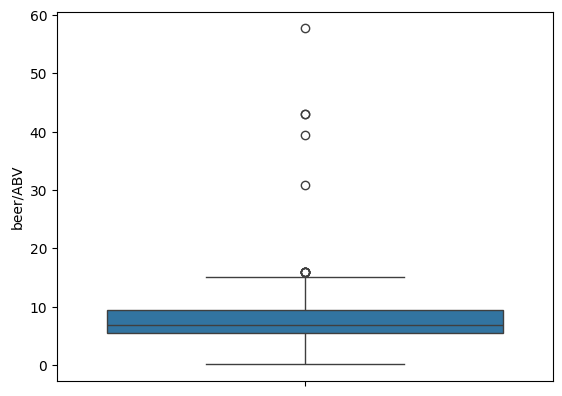

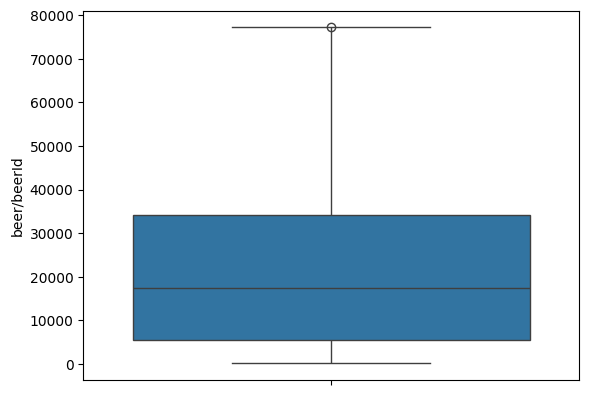

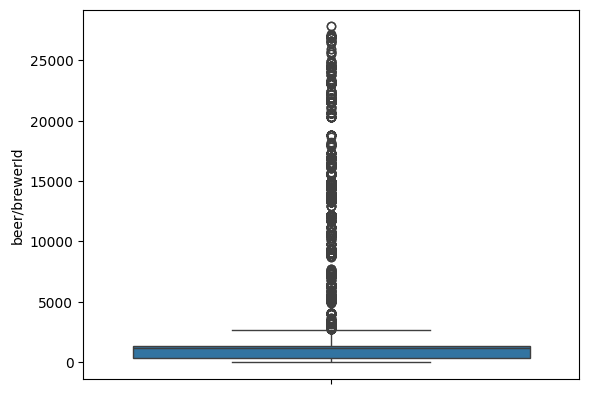

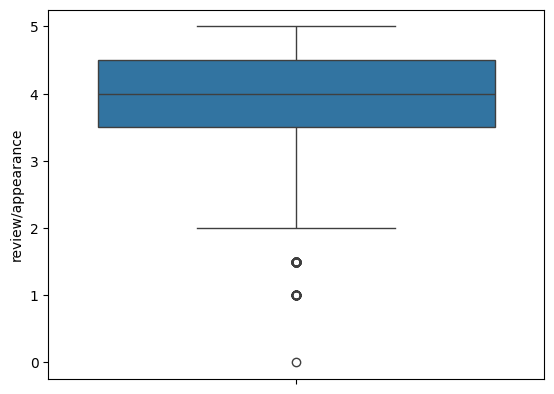

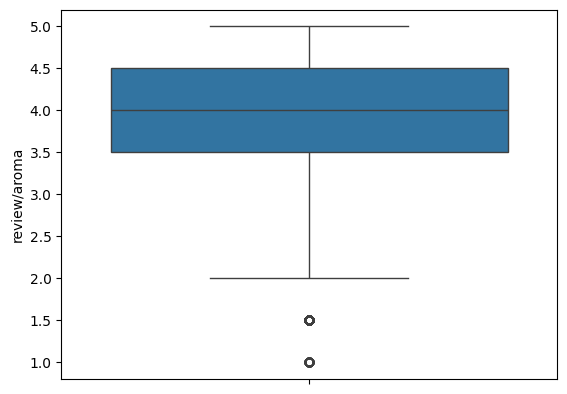

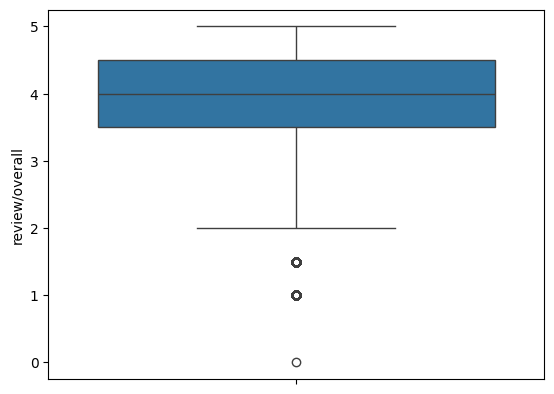

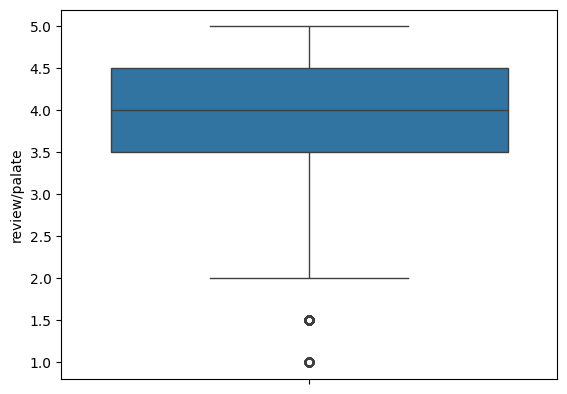

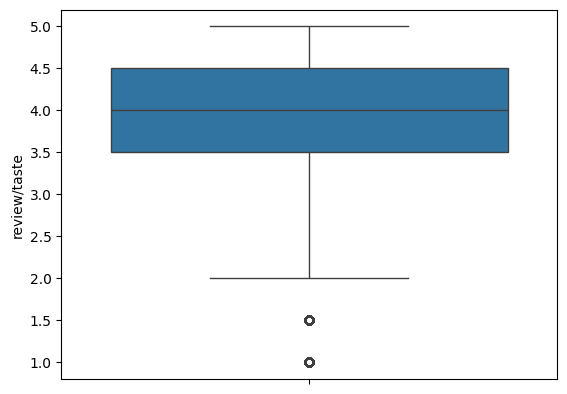

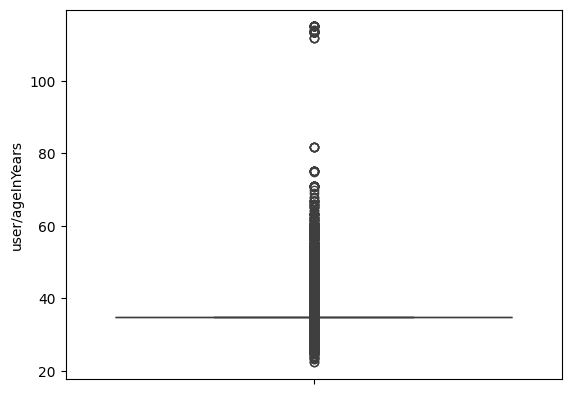

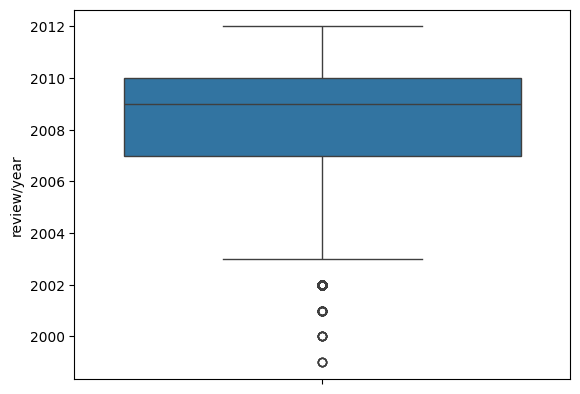

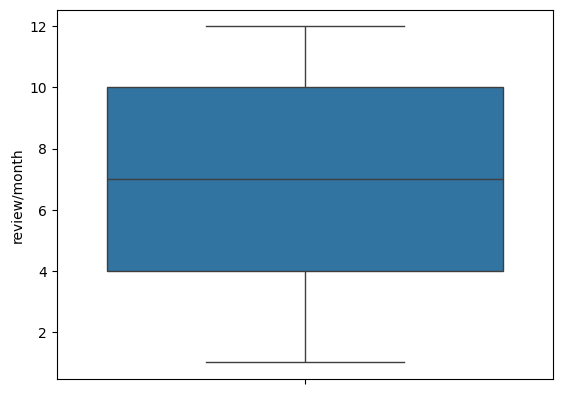

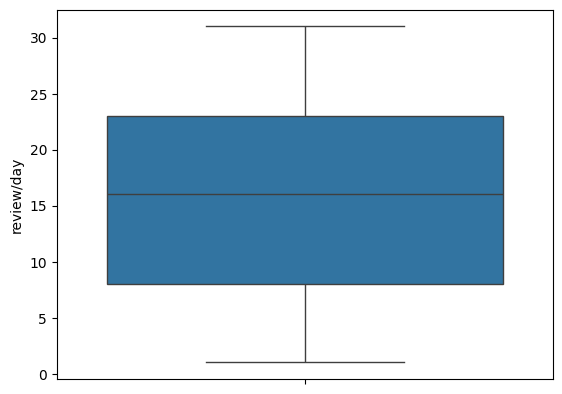

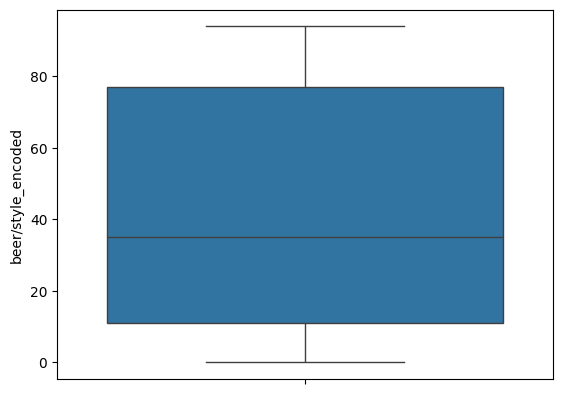

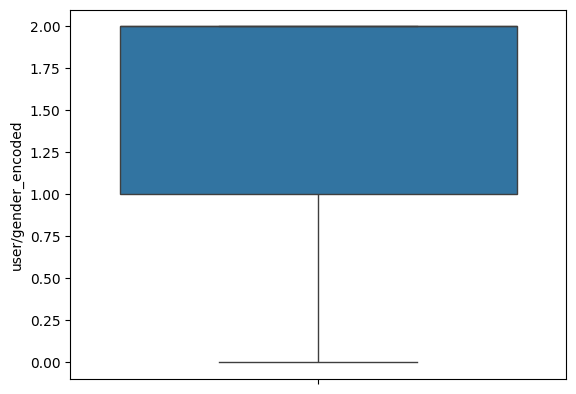

In [226]:
# Outlier detection
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [227]:
df[df['user/ageInYears']>80]

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/ageInYears,review/year,review/month,review/day,beer/style_encoded,user/gender_encoded
1570,9.8,16073,1199,3.5,4.5,4.5,3.5,4.0,115.020784,2008,1,16,79,2
2157,7.7,64883,1075,4.0,4.5,4.0,4.0,4.5,113.565990,2010,12,30,9,1
2982,9.0,8422,3282,4.5,3.5,3.0,3.0,4.0,115.020784,2005,4,28,26,2
3141,8.0,54731,263,4.0,4.0,4.5,4.0,4.0,81.735853,2010,12,13,36,1
3159,9.2,25852,1199,3.5,3.0,2.0,3.0,2.5,113.565990,2007,12,7,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,6.9,23474,1199,4.0,4.0,4.0,3.5,4.0,115.020784,2006,11,1,58,2
35541,12.0,17538,1199,4.0,3.5,1.5,3.5,2.0,113.565990,2008,4,14,9,1
35569,6.9,5487,2098,4.5,4.0,3.0,4.0,4.0,115.020784,2005,7,6,12,2
36246,5.3,20962,3268,4.0,4.0,4.5,4.0,4.5,115.020784,2005,2,25,61,2


In [228]:
# Handling outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out or cap outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [229]:
handle_outliers_iqr(df, 'user/ageInYears')

In [230]:
df[df['user/ageInYears']>80]

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/ageInYears,review/year,review/month,review/day,beer/style_encoded,user/gender_encoded


<Axes: >

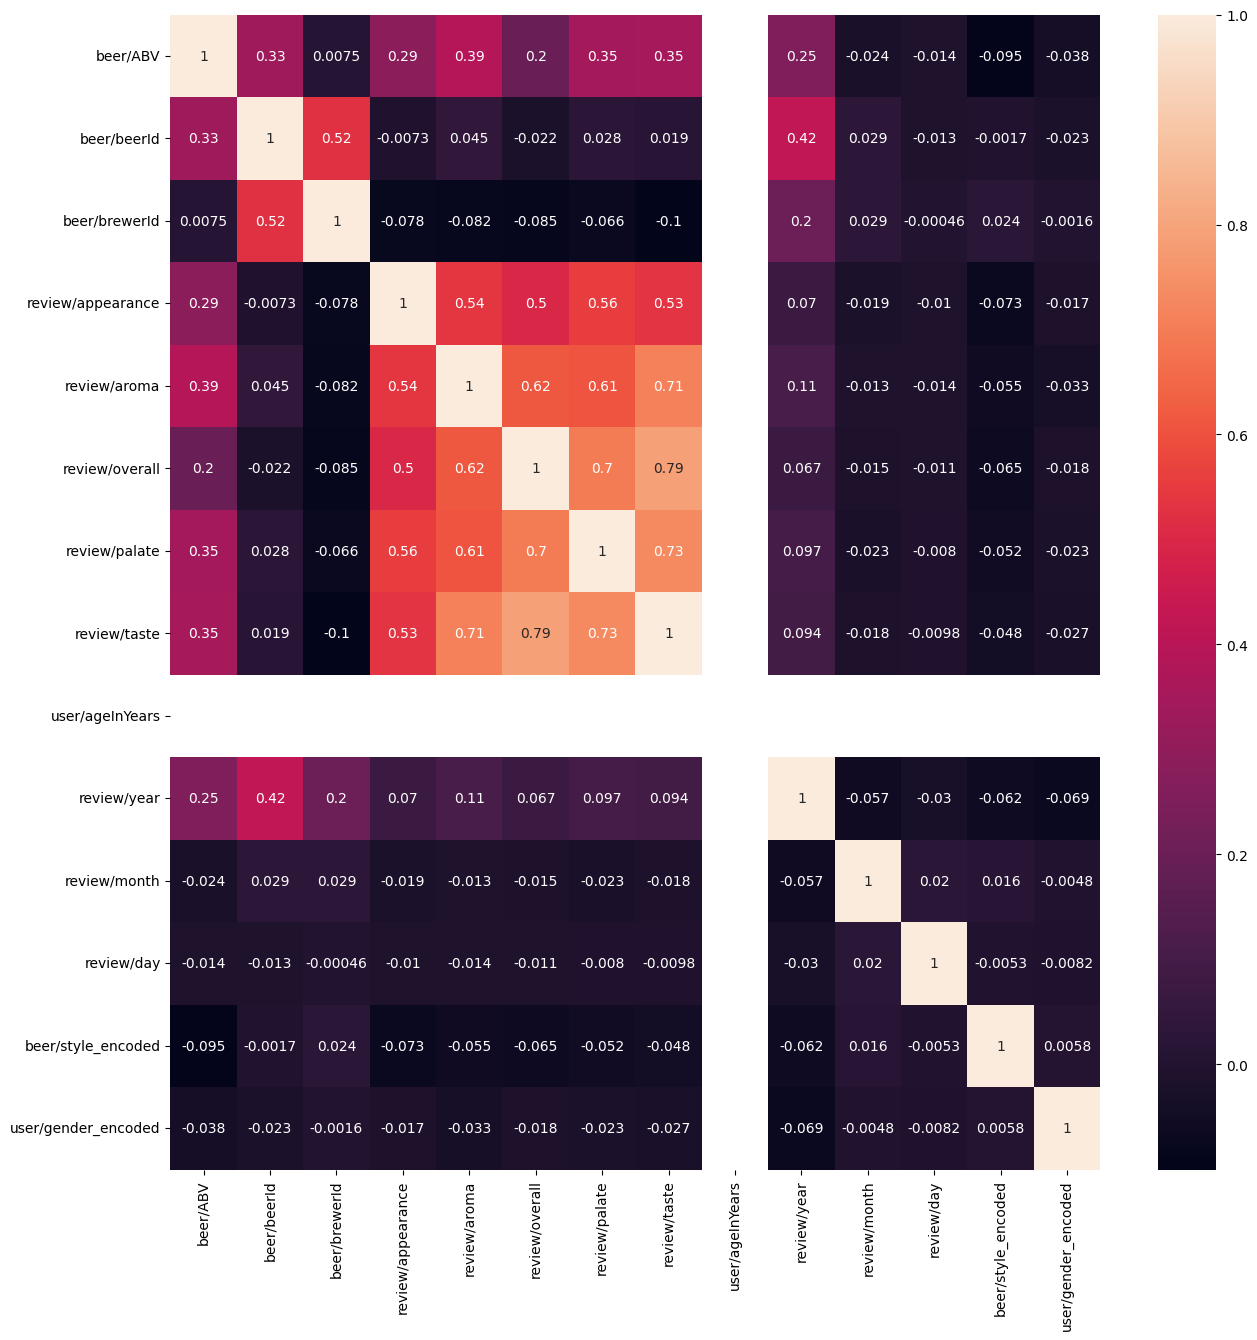

In [231]:
# Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

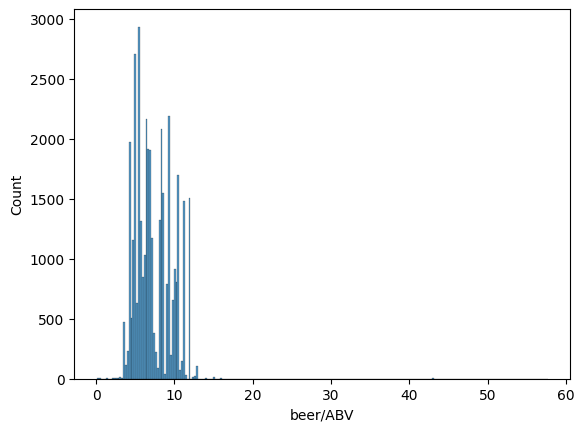

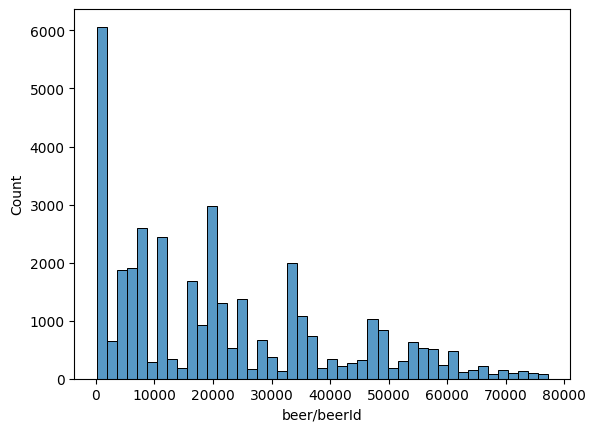

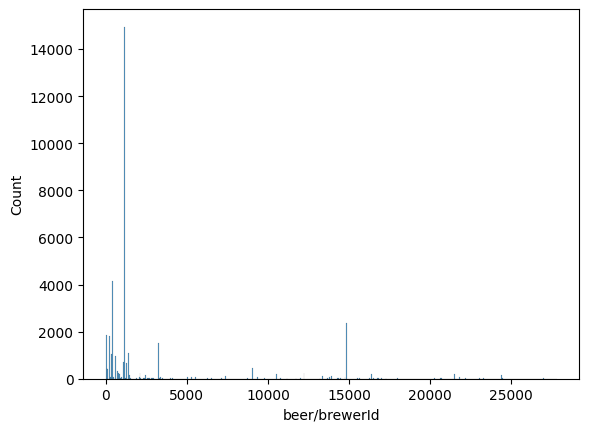

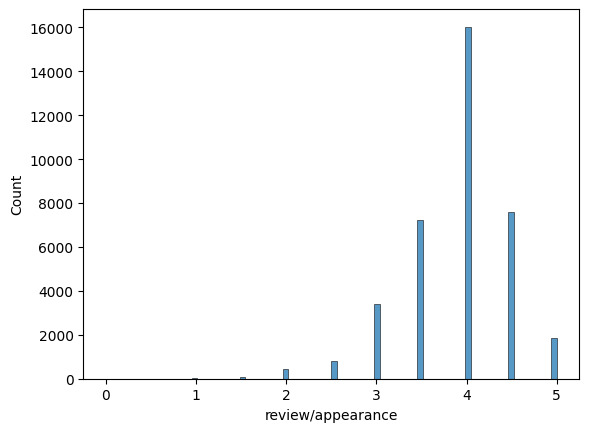

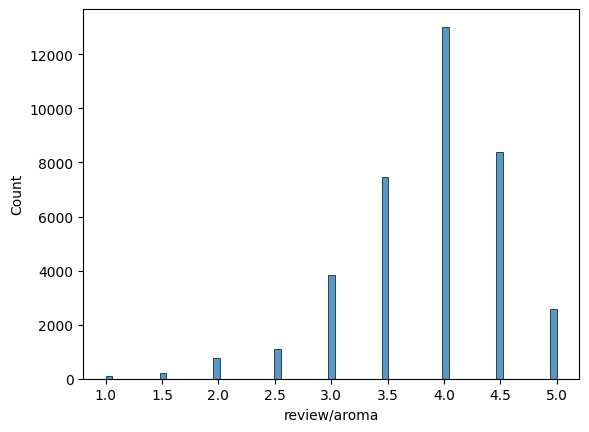

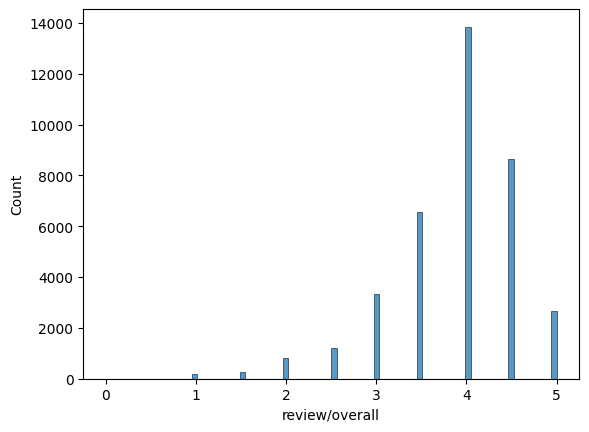

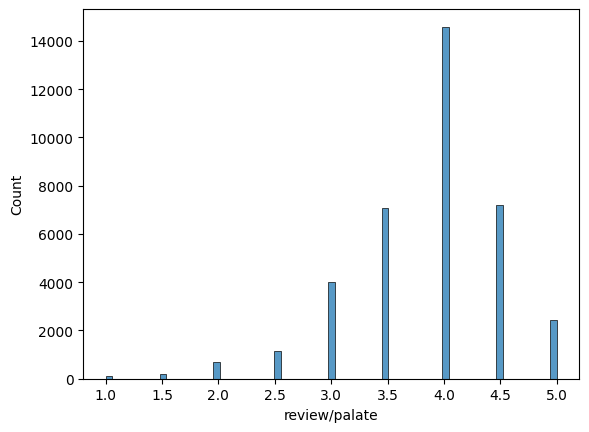

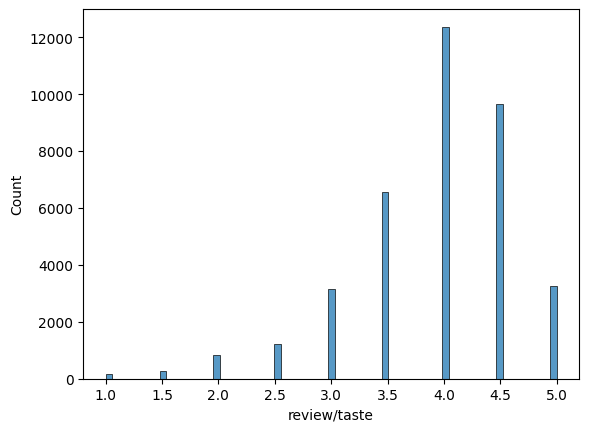

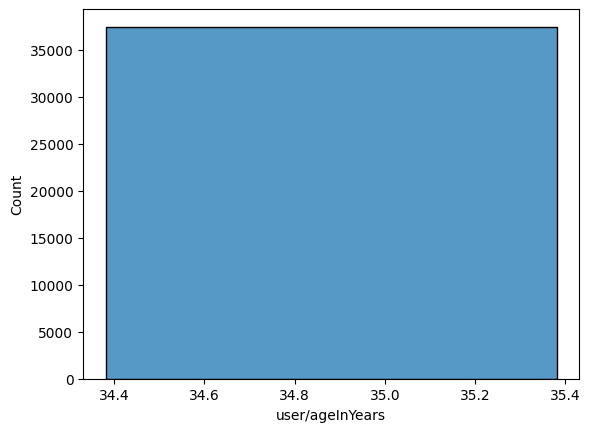

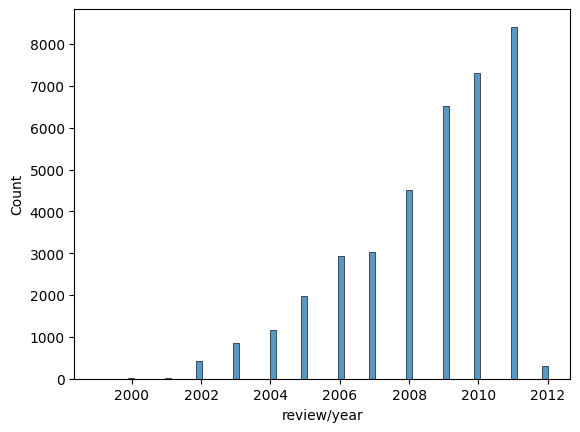

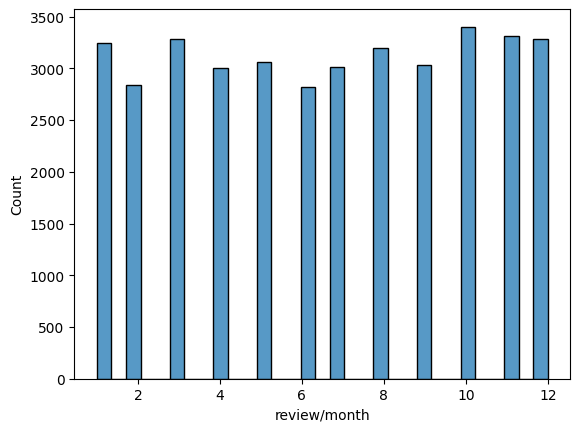

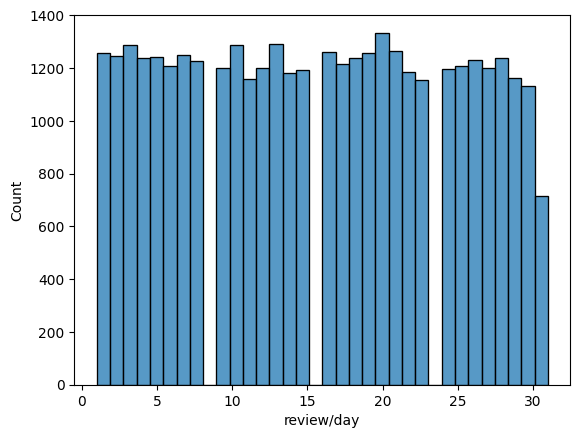

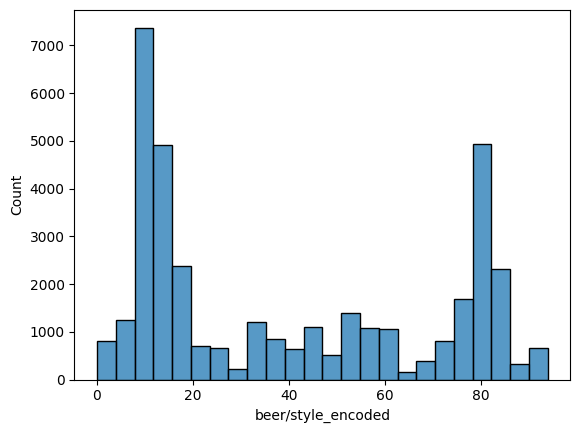

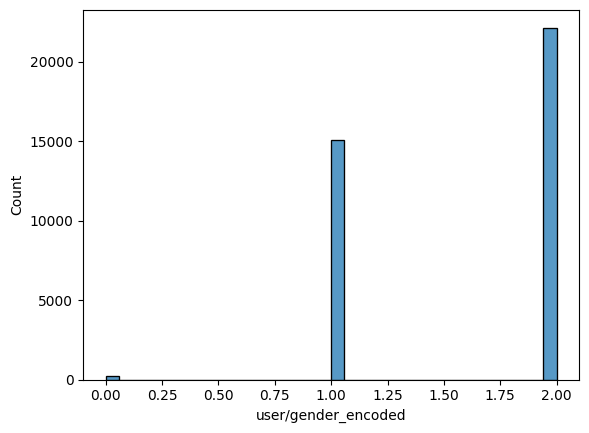

In [232]:
# plt.figure(figsize=(15,15))
for i in df.columns:
    sns.histplot(df[i])
    plt.show()


In [233]:
df

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/ageInYears,review/year,review/month,review/day,beer/style_encoded,user/gender_encoded
0,5.00,46634,14338,4.0,4.0,4.0,4.0,4.0,34.881058,2008,12,16,61,2
1,11.00,3003,395,4.0,3.5,3.5,3.5,3.0,34.881058,2008,8,8,4,2
2,4.70,961,365,3.5,4.0,3.5,3.5,3.5,34.881058,2004,11,26,14,1
3,4.40,429,1,3.0,3.0,2.5,3.0,3.0,34.881058,2011,6,20,35,1
4,4.40,4904,1417,4.0,3.0,3.0,3.5,2.5,34.881058,2011,3,12,46,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,5.50,22450,3268,4.0,3.5,3.5,3.5,3.5,34.881058,2008,4,10,58,2
37496,8.50,7463,1199,4.5,4.0,3.5,4.5,4.5,34.881058,2010,1,10,85,2
37497,4.75,1154,394,4.0,3.5,4.0,4.5,4.0,34.881058,2003,10,25,75,2
37498,11.20,19960,1199,4.0,4.0,4.0,5.0,5.0,34.881058,2011,1,29,11,2


# Model Building

In [234]:
# Splitting into dependent and independent variable
X = df.drop(columns=['review/overall'])
y = df['review/overall']

In [235]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [236]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((29972, 13), (29972,), (7493, 13), (7493,))

In [237]:
# Initialize models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()

In [238]:
# Train the models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LinearRegression()

In [239]:
# Make predictions
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Model Evaluation

In [240]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

In [241]:
# Evaluate Random Forest model
rf_eval = evaluate_model(y_test, rf_pred)

In [242]:
# Evaluate Linear Regression model
lr_eval = evaluate_model(y_test, lr_pred)

In [243]:
# Output the evaluation results
print("Random Forest Evaluation:", rf_eval)
print("Linear Regression Evaluation:", lr_eval)

Random Forest Evaluation: {'MSE': 0.1675414746823982, 'MAE': 0.3118780020082236, 'R2': 0.6576918584913785}
Linear Regression Evaluation: {'MSE': 0.16155828848012507, 'MAE': 0.3059273859662082, 'R2': 0.6699162545884202}
